In [62]:
import pickle
with open('/local/home/weijiexu/workspace/M2MHR/src/data/generated_dictionary_step5.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [63]:
#each key represent a different conversation
loaded_dict.keys()

dict_keys([1, 5, 6, 7, 8, 10, 11, 14, 17, 22, 23, 24, 25, 29, 31, 32, 36, 38, 40, 42, 46, 47, 48, 49, 50, 51, 54, 55, 59, 60, 61, 62, 63, 65, 67, 69, 72, 74, 76, 77, 79, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 102, 105, 106, 107, 108, 111, 113, 115, 120, 121, 122, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 140, 141, 142, 144, 145, 146, 147, 148, 149, 151, 155, 156, 157, 160, 161, 162, 164, 167, 169, 172, 173, 174, 175, 177, 178, 180, 181, 182, 183, 185, 186, 187, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 201, 202, 205, 206, 207, 208, 209, 215, 216, 217, 218, 219, 222, 223, 226, 228, 229, 230, 233, 238, 241, 242, 243, 245, 246, 247, 249, 250, 251, 252, 253, 256, 257, 260, 263, 264, 265, 266, 267, 270, 271, 273, 275, 279, 280, 283, 285, 286, 287, 288, 289, 291, 294, 295, 296, 299, 301, 303, 304, 305, 308, 310, 312, 313, 314, 315, 316, 317, 319, 322, 324, 328, 329, 330, 331, 332, 333, 334, 335, 338, 340, 341, 342, 345, 347, 348, 349, 352, 35

In [64]:
#For each data point, the whole conversation is represented by in the second part of the list each turn is splited by \n 
loaded_dict[1][1]

"\nHR Assistant: Hi there, how can I help you out today?\nEmployee: I'm hoping you can help me set up some machine learning training for my team.\nHR Assistant: No problem, tell me a bit about what kind of training you're looking for. What will you guys be learning about and do you need any special accommodations?\nEmployee: We're hoping to improve our machine learning research skills. But no special accommodations are needed.\nHR Assistant: Great, how many people will be attending this training? And approximately how long do you think it should last?  \nEmployee: Three people will be participating and we'd like it to run for two days.\nHR Assistant: Okay, thanks. Do you have a budget in mind for this? It would also help to know what your goals are for your team after the training.\nEmployee: Our budget is $5000. We want to come away with better research skills.\nHR Assistant: No problem, when works best for your schedule? Also, do you have a preference for how the training is delivere

In [65]:
#For each data point, each turn is represented as the sublist
#it contains firve things
#topics, relevant questions, ground truth answer, rephrased question, complete answer, extracted answer with confidence.
loaded_dict[6][0][3]


[['access_type', 'approval_from_supervisor'],
 'What type of access are you requesting? (e.g., System, Building, Document) Do you have approval from your supervisor or a relevant authority? (Name of approver)',
 'System access request, John Smith',
 'HR Assistant: What type of access are you looking to request? For example, is it system access, building access or document access? Do you have approval from your direct supervisor or another authorizing person? If so, who approved it?',
 'Employee: I am requesting system access. John Smith approved the request.',
 [(' system access.', 0.6824370622634888),
  (' John Smith', 0.8886477947235107)]]

In [67]:
import pandas as pd
assistants = []
employees = []
for index in loaded_dict:
    for turn in loaded_dict[index][0]:
        assistants.append(turn[3])
        employees.append(turn[4])
assistants = pd.DataFrame(assistants)
employees = pd.DataFrame(employees)
assistants.to_csv('assistants.csv', header=None)
employees.to_csv('employees.csv', header=None)


In [ ]:
#the ideal result is done by getting the ground truth that can be extracted by Employee answer like the following:

[['training_topic', 'special_requirements'],
 'What is the main topic or subject of the training you are requesting? Are there any special requirements or accommodations needed for the training?',
 'Machine learning research, None',
 "HR Assistant: No problem, tell me a bit about what kind of training you're looking for. What will you guys be learning about and do you need any special accommodations?",
 "Employee: We're hoping to improve our machine learning research skills. But no special accommodations are needed.",
 ['machine learning research', 'no special accommodations']]



In [1]:
import pickle
with open('/local/home/weijiexu/workspace/M2MHR/src/data/generated_dictionary_step6.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [11]:
scores = []
for index in loaded_dict:
    for value in loaded_dict[index][0]:
        for score in value[-2]:
            scores.append(score[1])

(array([202.,  54.,  60.,  58.,  44.,  67.,  41.,  62.,  51.,  52.,  48.,
         54.,  49.,  58.,  60.,  80.,  75.,  60.,  64.,  73.,  44.,  56.,
         46.,  65.,  63.,  50.,  46.,  69.,  53.,  53.,  37.,  42.,  73.,
         48.,  76.,  59.,  56.,  51.,  47.,  51.,  56.,  52.,  43.,  53.,
         77.,  51.,  56.,  70.,  52.,  72.,  75.,  57.,  50.,  47.,  69.,
         52.,  49.,  40.,  46.,  47.,  37.,  33.,  37.,  45.,  48.,  37.,
         35.,  40.,  45.,  42.,  48.,  39.,  41.,  47.,  51.,  56.,  43.,
         48.,  54.,  53.,  36.,  48.,  55.,  57.,  48.,  59.,  63.,  58.,
         76.,  76.,  94.,  85., 104., 113., 109., 136., 137., 127.,  90.,
         45.]),
 array([2.99405917e-10, 9.97341603e-03, 1.99468318e-02, 2.99202475e-02,
        3.98936632e-02, 4.98670789e-02, 5.98404947e-02, 6.98139104e-02,
        7.97873261e-02, 8.97607419e-02, 9.97341576e-02, 1.09707573e-01,
        1.19680989e-01, 1.29654405e-01, 1.39627821e-01, 1.49601236e-01,
        1.59574652e-01, 1.6954

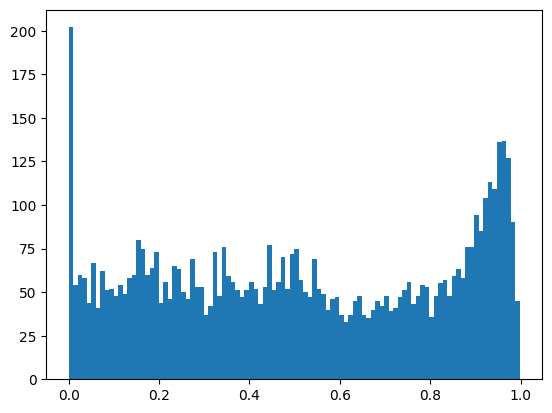

In [14]:
import matplotlib.pyplot as plt

plt.hist(scores, bins=100)

In [15]:
len(scores)

6006

In [18]:
len([i for i in scores if i < 0.2])

1313

In [22]:
loaded_dict[index][0][-2]

[['desired_relocation_date'],
 'When do you wish to relocate? (Enter the date in YYYY-MM-DD format)',
 '2023-06-01',
 'HR Assistant: No problem, when would be the ideal time frame for you to complete the relocation? Please provide a date.',
 'Employee: June 1st, 2023.',
 [(' June 1st, 2023.', 0.021046042442321777)],
 ['June 1st, 2023']]

In [23]:
import pickle
with open('/local/home/weijiexu/workspace/M2MHR/src/data/generated_dictionary_step3.pkl', 'rb') as f:
    loaded_dict3 = pickle.load(f)

In [26]:
loaded_dict[1]

[[[['training_topic', 'special_requirements'],
   'What is the main topic or subject of the training you are requesting? Are there any special requirements or accommodations needed for the training?',
   'Machine learning research, None',
   "HR Assistant: No problem, tell me a bit about what kind of training you're looking for. What will you guys be learning about and do you need any special accommodations?",
   "Employee: We're hoping to improve our machine learning research skills. But no special accommodations are needed.",
   [(' machine learning', 0.4094354510307312),
    (' no special accommodations are needed.', 0.3866746425628662)],
   ['machine learning', 'no special accommodations are needed']],
  [['number_of_participants', 'training_duration'],
   'How many people will be participating in the training? (Enter a number) How long should the training last? (Specify in hours or days)',
   '3, 2 days',
   'HR Assistant: Great, how many people will be attending this training? An

In [25]:
loaded_dict3[1]

{'training_topic': 'Machine learning research',
 'preferred_training_format': 'Online seminars',
 'number_of_participants': 3,
 'current_skill_level': 'Intermediate',
 'desired_training_outcomes': 'Improve research skills',
 'training_duration': '2 days',
 'preferred_training_dates': '2023-06-15',
 'budget_constraints': '$5000',
 'special_requirements': 'None',
 'contact_information': 'Henry Kim hkim@researchlab.com 555-1234',
 'template': 'training_request'}

In [52]:
#The question is 
#The context is 
#The answer is 
#Does  equivalent to the answer? 
with open('/local/home/weijiexu/workspace/M2MHR/src/data/template.pkl', 'rb') as f:
    templates = pickle.load(f)
answers = []
keys = []
for index in loaded_dict:
    for ind, value in enumerate(loaded_dict[index][0]):
        length = len(value[-2])
        for l in range(length):
            if value[-2][l][1] < 0.1:
                answer = []
                answer.append(index )
                answer.append(ind)
                answer.append(l)
                answer.append(value[4])
                answer.append("Question: " + k2q[value[0][l]] + " There are two answers: " + str(loaded_dict3[index][value[0][l]]) + " and "+ value[-2][l][0] + ". Are they equivalent?")
                answers.append(answer)

In [55]:
import pandas as pd
pd.DataFrame(answers, columns = ['index', 'turn', 'order', 'context', 'question']).to_csv('complete_labeling_task1.csv')

In [61]:
raw = pd.DataFrame([i[-1] for i in answers]) 
raw.to_csv('raw_label_task1.csv', header=None)

In [59]:
raw

,0
0,Question: Please provide your contact informat...
1,Question: When did the harassment incident occ...
2,Question: Was there any property damage? If ye...
3,Question: Was there any property damage? If ye...
4,Question: How many individuals were affected b...
...,...
687,"Question: How severe is the issue? (e.g., Low,..."
688,Question: What is your action plan to achieve ...
689,Question: Are there any additional notes or in...
690,Question: Was there any property damage? If ye...


In [ ]:
|